# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

# Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Create url
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define units
units = 'imperial'

# Create query url with weather_api_key and units
query = f"{url}appid={weather_api_key}&units={units}&q="

# Json response
response = requests.get(query + city).json()
response

{'coord': {'lon': -159.319, 'lat': 22.0752},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 75.65,
  'feels_like': 74.03,
  'temp_min': 75.2,
  'temp_max': 75.99,
  'pressure': 1019,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 120},
 'clouds': {'all': 1},
 'dt': 1613084395,
 'sys': {'type': 1,
  'id': 7873,
  'country': 'US',
  'sunrise': 1613063446,
  'sunset': 1613104346},
 'timezone': -36000,
 'id': 5848280,
 'name': 'Kapaa',
 'cod': 200}

In [4]:
# Create list of items for data frame
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
set_one = 1

# Print Beginning Data Retrieval
print(f'Beginning Data Retrieval')
print(f'----------------------------------')

# Running a loop to append data to lists
for city in cities:
    try:
        response = requests.get(query + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_record = response ['name']
        if record > 49:
            record = 1
            set_one += 1
        else:
            record += 1
        
#       Print if city is found
        print(f'Processing Record {record} of Set {set_one} | {city_record}')
        
#       Print if city is not found
    except: 
        print(f'City not found.  Skipping...')

# Print Data Retrieval Complete
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 1 | Ushuaia
Processing Record 2 of Set 1 | Saint-Philippe
Processing Record 3 of Set 1 | Barrow
Processing Record 4 of Set 1 | Mataura
Processing Record 5 of Set 1 | Punta Arenas
Processing Record 6 of Set 1 | Kruisfontein
Processing Record 7 of Set 1 | East London
Processing Record 8 of Set 1 | Lata
Processing Record 9 of Set 1 | Thurso
Processing Record 10 of Set 1 | Kapaa
Processing Record 11 of Set 1 | Port Alfred
Processing Record 12 of Set 1 | Jamestown
Processing Record 13 of Set 1 | Mar del Plata
Processing Record 14 of Set 1 | Vila Velha
Processing Record 15 of Set 1 | Hofn
Processing Record 16 of Set 1 | Turukhansk
Processing Record 17 of Set 1 | Saint Simons
Processing Record 18 of Set 1 | Mahébourg
Processing Record 19 of Set 1 | Killybegs
Processing Record 20 of Set 1 | El Copé
Processing Record 21 of Set 1 | Pudozh
Processing Record 22 of Set 1 | Måløy
Processing Record 23 of Set 1 | Bu

Processing Record 37 of Set 4 | Imeni Babushkina
Processing Record 38 of Set 4 | Tual
Processing Record 39 of Set 4 | Eyl
Processing Record 40 of Set 4 | Huambo
Processing Record 41 of Set 4 | Luanda
Processing Record 42 of Set 4 | Yangi Marg`ilon
Processing Record 43 of Set 4 | Budeşti
Processing Record 44 of Set 4 | Norden
Processing Record 45 of Set 4 | Bereda
Processing Record 46 of Set 4 | Morwell
Processing Record 47 of Set 4 | Cabo San Lucas
Processing Record 48 of Set 4 | Praia
Processing Record 49 of Set 4 | Kumul
Processing Record 50 of Set 4 | Chake Chake
Processing Record 1 of Set 5 | Vestmannaeyjar
Processing Record 2 of Set 5 | Twin Falls
Processing Record 3 of Set 5 | Ketchikan
Processing Record 4 of Set 5 | Panzhihua
Processing Record 5 of Set 5 | Chalmette
Processing Record 6 of Set 5 | Santa Maria
Processing Record 7 of Set 5 | Kamenka
Processing Record 8 of Set 5 | Mergen
Processing Record 9 of Set 5 | Mawlaik
Processing Record 10 of Set 5 | Burnie
Processing Record 

Processing Record 25 of Set 8 | Clyde River
Processing Record 26 of Set 8 | Olafsvik
Processing Record 27 of Set 8 | Vardø
Processing Record 28 of Set 8 | Kanel
Processing Record 29 of Set 8 | Russell
Processing Record 30 of Set 8 | Kapuskasing
Processing Record 31 of Set 8 | Puerto Nariño
Processing Record 32 of Set 8 | Kalmunai
Processing Record 33 of Set 8 | Pontianak
Processing Record 34 of Set 8 | Kamphaeng Phet
Processing Record 35 of Set 8 | Marsá Maţrūḩ
Processing Record 36 of Set 8 | Kāzerūn
Processing Record 37 of Set 8 | Chīpurupalle
Processing Record 38 of Set 8 | Berdigestyakh
City not found.  Skipping...
Processing Record 39 of Set 8 | Bose
Processing Record 40 of Set 8 | Pomabamba
Processing Record 41 of Set 8 | Avera
Processing Record 42 of Set 8 | Glendive
Processing Record 43 of Set 8 | Manoel Urbano
Processing Record 44 of Set 8 | Portland
Processing Record 45 of Set 8 | Nicoya
Processing Record 46 of Set 8 | Acapulco de Juárez
Processing Record 47 of Set 8 | Spearfi

Processing Record 9 of Set 12 | Levice
Processing Record 10 of Set 12 | Sterling
Processing Record 11 of Set 12 | Derzhavīnsk
Processing Record 12 of Set 12 | Grand Gaube
Processing Record 13 of Set 12 | Ciudad Gustavo Díaz Ordaz
Processing Record 14 of Set 12 | Richards Bay
Processing Record 15 of Set 12 | Saint-Honoré
Processing Record 16 of Set 12 | Namuac
Processing Record 17 of Set 12 | Nové Město na Moravě
Processing Record 18 of Set 12 | High Rock
Processing Record 19 of Set 12 | Curvelo
Processing Record 20 of Set 12 | Riyadh
Processing Record 21 of Set 12 | Casas Grandes
Processing Record 22 of Set 12 | Puro
Processing Record 23 of Set 12 | Chengde
Processing Record 24 of Set 12 | Ohangaron
Processing Record 25 of Set 12 | Chennai
Processing Record 26 of Set 12 | Vygonichi
Processing Record 27 of Set 12 | Soyo
City not found.  Skipping...
Processing Record 28 of Set 12 | Miranda
Processing Record 29 of Set 12 | San Luis
Processing Record 30 of Set 12 | China
Processing Record 

#  Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [5]:
# Create dictionary Data Frame aligning to data lists
city_data = pd.DataFrame({
    'City': city_name,
    'Country': country,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temperature (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed,
    'Date': date
})

# Print data frame and export to csv file
city_data.to_csv('../output_data/cities.csv', encoding="utf-8", index=False)
city_data

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Ushuaia,AR,-54.8000,-68.3000,53.60,66,75,5.75,1613084207
1,Saint-Philippe,RE,-21.3585,55.7679,78.80,61,99,4.61,1613084449
2,Barrow,US,71.2906,-156.7887,-43.60,83,1,9.22,1613084247
3,Mataura,NZ,-46.1927,168.8643,61.59,49,1,2.19,1613084389
4,Punta Arenas,CL,-53.1500,-70.9167,55.40,47,0,31.07,1613084545
...,...,...,...,...,...,...,...,...,...
590,Tocopilla,CL,-22.0920,-70.1979,71.40,62,0,4.59,1613084851
591,Ranau,MY,5.9538,116.6641,75.20,94,20,4.61,1613084851
592,Krasnyy Kut,RU,50.9500,46.9667,28.54,99,98,2.84,1613084851
593,Libreville,GA,0.3925,9.4537,84.20,84,20,5.75,1613084851


# Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [6]:
#  Get the indices of cities that have humidity over 100%.
hund_humidity = city_data.loc[(city_data['Humidity (%)'] > 100) & (city_data['Humidity (%)'] <= 1000)]
hund_humidity_df = pd.DataFrame(hund_humidity)
len(hund_humidity_df)

0

# Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

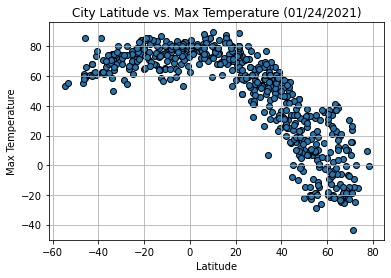

<Figure size 432x288 with 0 Axes>

In [7]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Max Temperature (F)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
plt.savefig('../output_data/Latitude_vs_Max_Temperature.png')
plt.show()

# City Latitude vs. Max Temperature Analysis
- The closer the latitude is to 0 (equator) the higher the max temperature becomes.  The further away from the equator, the lower the max temperature.

# Latitude vs. Humidity Plot

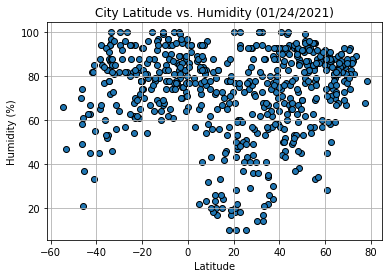

<Figure size 432x288 with 0 Axes>

In [8]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Humidity (%)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
plt.savefig('../output_data/Latitude_vs_Humidity.png')
plt.show()

# Latitude vs Humidity Analysis
- The humidity seems to not have an correlation with latitude.  Typically it does not matter where you live in the world, the humidity for most cities is 60% or above.  

# Latitude vs. Cloudiness Plot

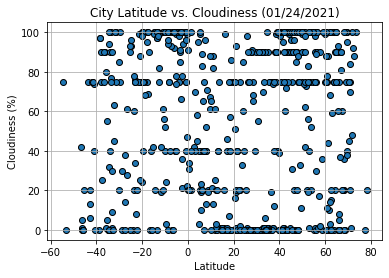

<Figure size 432x288 with 0 Axes>

In [9]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Cloudiness (%)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
plt.savefig('../output_data/Latitude_vs_Cloudiness.png')
plt.show()

# Latitude vs Cloudiness Analysis
- There is zero correlation between the latitude and cloudiness.  It does not seem to matter where you are in the world, the cloudiness can be any percentage on any given day. 

# Latitude vs. Wind Speed Plot

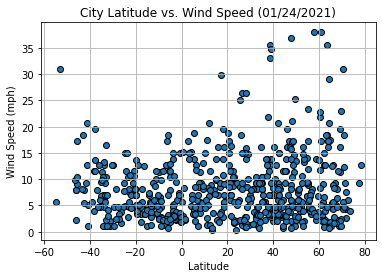

<Figure size 432x288 with 0 Axes>

In [10]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Wind Speed (mph)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
plt.savefig('../output_data/Latitude_vs_Wind_Speed.png')
plt.show()

# Latitude vs Wind Speed Analysis
- The typical average wind speed seems to be below 20% for any given city and latitude doesn't seem to play a factor in wind speed.  Although the northern hemisphere (Latitude above 0) seems to have more outliers that are greater then the 20% wind speed.  

# Linear Regression

In [11]:
# Create northern and southern hemisphere variables. 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# Southern Hemisphere (less than 0 degrees latitude)
north_hem = city_data.loc[(city_data['Latitude'] >= 0) & (city_data['Latitude'] <= 90)]
south_hem = city_data.loc[(city_data['Latitude'] >= -90) & (city_data['Latitude'] < 0 )]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7612994954052397


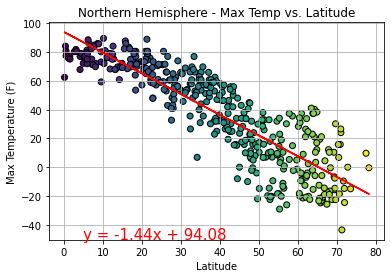

<Figure size 432x288 with 0 Axes>

In [12]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Max Temperature (F)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Northern Hemisphere - Temperature (F) vs. Latitude.png')
plt.show()

# Northern Hemisphere - Max Temp vs Latitude Analysis
 - The latitude and maximum temperature seem to have a negative correlation.  For every latitude degree away from the equator (equator = 0), the maximum temperature decreases by about 1 and a half degrees.  
 - In conclusion, the further away you are from the equator the lower the maximum temperature.  

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.20428061201312872


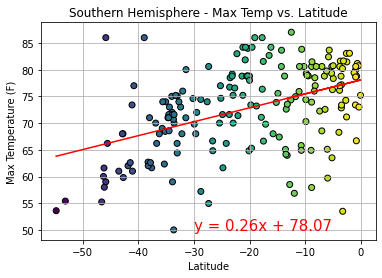

<Figure size 432x288 with 0 Axes>

In [13]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Max Temperature (F)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Southern Hemisphere - Temperature (F) vs. Latitude.png')
plt.show()

# Southern Hemisphere - Max Temp vs Latitude Analysis
- The latitude and maximum temperature seem to have a positive correlation. For every latitude degree away from the South Pole (-90), the maximum temperature increases by about a half degree.
- In conclusion, the closer you are to the equator the higher the maximum temperature. The Southern Hemisphere seems to have more spread out data, meaning not all of the cities fall in line with this correlation.  For example, some cities are close to the equator but yet have a lower maximum temperature and some cities are further away from the equator and they have a higher maximum temperature.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08687659323520196


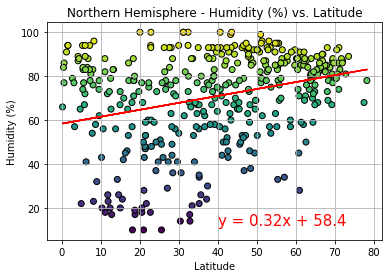

<Figure size 432x288 with 0 Axes>

In [14]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Humidity (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png')
plt.show()

# Northern Hemisphere - Humidity vs Latitude Analysis
- The latitude and humidity seem to have a positive correlation. For every latitude degree away from the equator (equator = 0), the humidity increases by about a half percent.
- In conclusion, the further away you are from the equator the higher the humidity. The Northern Hemisphere seems to have more spread out data, meaning not all of the cities fall in line with this correlation. For example, some cities are close to the equator but yet have a higher humidity percentage and some cities are further away from the equator and they have a lower humidity percentage.

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11859953689685242


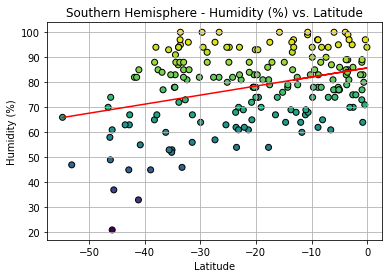

<Figure size 432x288 with 0 Axes>

In [15]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Humidity (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-24,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png')
plt.show()

# Southern Hemisphere - Humidity vs Latitude Analysis
- The latitude and humidity seem to have a positive correlation. For every latitude degree away from the South Pole (-90), the humidity increases by less than a tenth of a percent.
- The Southern Hemisphere seems to have more spread out data, meaning the major of the cities do not fall in line with this correlation. Most cities in the Southern Hemisphere have higher humidity percentages. 

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.057366470614336744


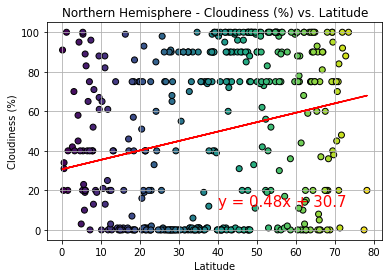

<Figure size 432x288 with 0 Axes>

In [16]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png')
plt.show()

# Northern Hemisphere - Cloudiness vs Latitude Analysis
- The latitude and cloudiness seem to have a positive correlation. For every latitude degree away from the equator (equator = 0), the cloudiness increases by about a half percent.
- This Northern Hemisphere data seems to have more spread out data, meaning the majority of the cities do not fall in line with this correlation. It doesn't matter which latitude degree the city is located at, they could have 0% cloudiness to 100% cloudiness.  

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12710700723713653


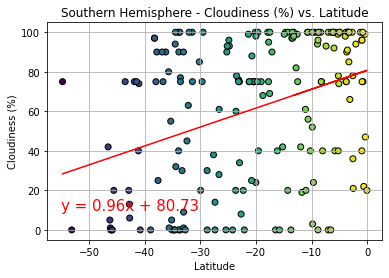

<Figure size 432x288 with 0 Axes>

In [17]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png')
plt.show()

# Southern Hemisphere - Cloudiness vs Latitude Analysis
- The latitude and cloudiness seem to have a positive correlation. For every latitude degree away from the South Pole (-90), the cloudiness increases by about a half percent.
- This Southern Hemisphere data seems to have more spread out data, meaning the majority of the cities do not fall in line with this correlation. It doesn't matter which latitude degree the city is located at, they could have 0% cloudiness to 100% cloudiness.  

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004616762543009871


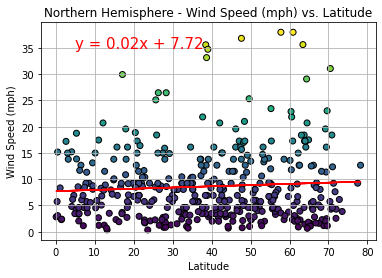

<Figure size 432x288 with 0 Axes>

In [18]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed (mph)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png')
plt.show()

# Northern Hemisphere - Wind Speed vs Latitude Analysis
- The latitude and wind speed seem to have a negative correlation. For every latitude degree away from the equator (equator = 0), the wind speed decreases by about 2 hundredths mph.
- For the most part, the latitude doesn't matter because the wind speeds vary on average anywhere between 0 mph to about 20 mph.  There are a few outliers that are greater than 20 mph.   

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07444524074539031


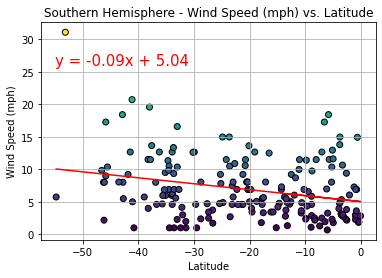

<Figure size 432x288 with 0 Axes>

In [19]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed (mph)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,26),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Save fig as png
plt.savefig('../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png')
plt.show()

# Southern Hemisphere - Wind Speed vs Latitude Analysis
- The latitude and wind speed seem to have a negative correlation. For every latitude degree away from the South Pole (-90), the wind speed decreases by about 3 hundredths mph.
- For the most part, the latitude doesn't matter because the wind speeds vary on average anywhere between 0 mph to about 15 mph.  There are a few outliers that are greater than 15 mph. The Southern Hemisphere does seem to have lower wind speeds than the Northern Hemisphere.  